## Instalação de dependências externas necessárias

In [2]:
%pip install pandas -q
%pip install matplotlib -q
%pip install pandas-profiling
%pip install seaborn
%pip install numpy
%pip install -U scikit-learn
%pip install yellowbrick
%pip install lightgbm
%pip install imblearn
%pip install lime
%pip install shap

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a94c621d6a4976e9c30c801c6db11353f4b54987426c877633619d7c18b348b6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.7 MB/s eta 0:00:00


## Carregamento das dependências

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)
import sqlite3
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, KFold

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder



from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor



from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet


import joblib




# Descrição  
Este conjunto de dados oferece uma visão abrangente de vários fatores que afetam o desempenho dos alunos em exames. Ele inclui informações sobre hábitos de estudo, frequência, envolvimento dos pais e outros aspectos que influenciam o sucesso acadêmico.

## Dicionário de dados

- **Hours_Studied:** Número de horas estudadas por semana.  
- **Attendance:** Percentual de aulas assistidas.  
- **Parental_Involvement:** Nível de envolvimento dos pais na educação do estudante (Baixo, Médio, Alto).  
- **Access_to_Resources:** Disponibilidade de recursos educacionais (Baixo, Médio, Alto).  
- **Extracurricular_Activities:** Participação em atividades extracurriculares (Sim, Não).  
- **Sleep_Hours:** Número médio de horas de sono por noite.  
- **Previous_Scores:** Notas de exames anteriores.  
- **Motivation_Level:** Nível de motivação do estudante (Baixo, Médio, Alto).  
- **Internet_Access:** Disponibilidade de acesso à internet (Sim, Não).  
- **Tutoring_Sessions:** Número de sessões de tutoria frequentadas por mês.  
- **Family_Income:** Nível de renda familiar (Baixo, Médio, Alto).  
- **Teacher_Quality:** Qualidade dos professores (Baixa, Média, Alta).  
- **School_Type:** Tipo de escola frequentada (Pública, Privada).
- **Peer_Influence:** Influência dos colegas no desempenho acadêmico (Positiva, Neutra, Negativa).
- **Physical_Activity:** Número médio de horas de atividade física por semana.
- **Learning_Disabilities:** Presença de dificuldades de aprendizagem (Sim, Não).
- **Parental_Education_Level:** Nível de escolaridade mais alto dos pais (Ensino Médio, Faculdade, - Pós-graduação).
- **Distance_from_Home:** Distância de casa para a escola (Perto, Moderada, Longe).
- **Gender:** Gênero do estudante (Masculino, Feminino).
- **Exam_Score:** Nota final do exame.

# Importação do dataset e criação de DB

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/LSouzaAndrade/TechChallenge3/refs/heads/main/Datasets/StudentPerformanceFactors.csv')
conn = sqlite3.connect('./Datasets/StudentPerformanceFactors.db')
df.to_sql('StudentData', conn, if_exists='replace', index=False)
conn.close()

## Data Cleaning

In [4]:
df.shape

(6607, 20)

In [5]:
df.columns.to_list()

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

In [6]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# EDA

### Features com valores únicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [7]:
df.nunique().sort_values()

Extracurricular_Activities     2
Internet_Access                2
Gender                         2
School_Type                    2
Learning_Disabilities          2
Distance_from_Home             3
Parental_Involvement           3
Access_to_Resources            3
Parental_Education_Level       3
Motivation_Level               3
Family_Income                  3
Teacher_Quality                3
Peer_Influence                 3
Sleep_Hours                    7
Physical_Activity              7
Tutoring_Sessions              9
Hours_Studied                 41
Attendance                    41
Exam_Score                    45
Previous_Scores               51
dtype: int64

### NaN Analysis
Verificando se existem valores nulos no dataset


In [8]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
df["Parental_Education_Level"].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [10]:
df["Teacher_Quality"].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

In [11]:
df["Distance_from_Home"].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

Verificando a porcentagem de valores nulos do dataset

In [12]:
linhas_com_nulos = df.isnull().any(axis=1).sum()
total_linhas = len(df)

# Calculo da porcentagem de linhas com valores nulos
percentual_nulos = (linhas_com_nulos / total_linhas) * 100

print(f"Total de linhas com valores nulos: {linhas_com_nulos}")
print(f"Porcentagem de linhas com valores nulos: {percentual_nulos:.2f}%")

Total de linhas com valores nulos: 229
Porcentagem de linhas com valores nulos: 3.47%


Como a porcentagem de dados faltantes é relativamente pequena (3,47%), decidiu-se remover essas linhas do dataset. Além disso, as variáveis 'Parental_Education_Level' e 'Teacher_Quality' possuem uma influência direta no desempenho acadêmico dos alunos, e a ausência dessas informações poderia comprometer a qualidade da análise.


In [13]:
# Eliminando os valores nulos do dataset
tam_df = df.shape[0]
print('Shape antes do dropna: ',df.shape[0])
df.dropna(subset=["Parental_Education_Level", "Teacher_Quality", "Distance_from_Home"],inplace = True)
tam_df_dropna = df.shape[0]
print('Shape após o dropna: ',df.shape[0])


Shape antes do dropna:  6607
Shape após o dropna:  6378


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

## Estatística Básica

### Variáveis Numéricas


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


Aqui vemos que temos valores excedendo 100 na nota do exame, por isso vamos retirá-lo do dataset

In [16]:
# verificando quantas linhas possuem valores acima de 100
len(df.query('Exam_Score > 100'))

1

In [17]:
#Eliminando a linha do dataset
df.drop(df[df['Exam_Score'] > 100].index, inplace=True)

### Variáveis Categóricas

In [18]:
df.describe(include = 'object').T

,count,unique,top,freq
Parental_Involvement,6377,3,Medium,3251
Access_to_Resources,6377,3,Medium,3203
Extracurricular_Activities,6377,2,Yes,3806
Motivation_Level,6377,3,Medium,3237
Internet_Access,6377,2,Yes,5893
Family_Income,6377,3,Low,2582
Teacher_Quality,6377,3,Medium,3826
School_Type,6377,2,Public,4433
Peer_Influence,6377,3,Positive,2552
Learning_Disabilities,6377,2,No,5709


In [19]:
df.Parental_Involvement.value_counts(normalize = True).to_frame()

,proportion
Parental_Involvement,
Medium,0.509801
High,0.287910
Low,0.202289


In [20]:
df.Access_to_Resources.value_counts(normalize = True).to_frame()

,proportion
Access_to_Resources,
Medium,0.502274
High,0.297946
Low,0.199780


In [21]:
df.Extracurricular_Activities.value_counts(normalize = True).to_frame()

,proportion
Extracurricular_Activities,
Yes,0.596832
No,0.403168


In [22]:
df.Motivation_Level.value_counts(normalize = True).to_frame()

,proportion
Motivation_Level,
Medium,0.507605
Low,0.292144
High,0.200251


In [23]:
df.Internet_Access.value_counts(normalize = True).to_frame()

,proportion
Internet_Access,
Yes,0.924102
No,0.075898


In [24]:
df.Family_Income.value_counts(normalize = True).to_frame()

,proportion
Family_Income,
Low,0.404893
Medium,0.402384
High,0.192724


In [25]:
df.Teacher_Quality.value_counts(normalize = True).to_frame()

,proportion
Teacher_Quality,
Medium,0.599969
High,0.298573
Low,0.101458


In [26]:
df.School_Type.value_counts(normalize = True).to_frame()

,proportion
School_Type,
Public,0.695154
Private,0.304846


In [27]:
df.Peer_Influence.value_counts(normalize = True).to_frame()

,proportion
Peer_Influence,
Positive,0.400188
Neutral,0.391250
Negative,0.208562


In [28]:
df.Learning_Disabilities.value_counts(normalize = True).to_frame()

,proportion
Learning_Disabilities,
No,0.895249
Yes,0.104751


In [29]:
df.Parental_Education_Level.value_counts(normalize = True).to_frame()

,proportion
Parental_Education_Level,
High School,0.495217
College,0.304061
Postgraduate,0.200721


In [30]:
df.Distance_from_Home.value_counts(normalize = True).to_frame()

,proportion
Distance_from_Home,
Near,0.596048
Moderate,0.304218
Far,0.099733


In [31]:
df.Gender.value_counts(normalize = True).to_frame()

,proportion
Gender,
Male,0.578328
Female,0.421672


Separando as colunas catérgóricas e númericas

In [32]:
numerical_col=[col for col in df.columns if df[col].dtype!='object']
categorical_col=[col for col in df.columns if df[col].dtype=='object']

## Visualização de dados

In [33]:
categorical_col

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

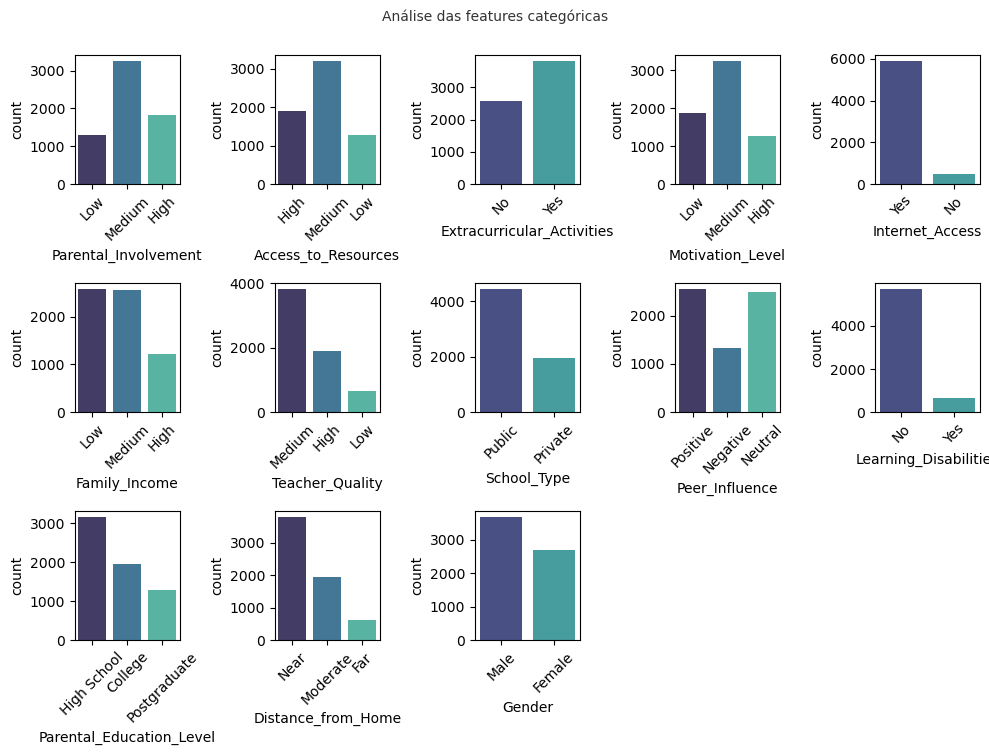

In [116]:
plt.figure(figsize=(10, 7.5))
plt.suptitle("Análise das features categóricas",
             fontsize=10,
             alpha=0.8,
             y=1.)


for i in range(len(categorical_col)):
    plt.subplot(3, 5, i+1)  
    sns.countplot(x=df[categorical_col[i]], palette="mako")
    plt.xlabel(categorical_col[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [34]:
numerical_col

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

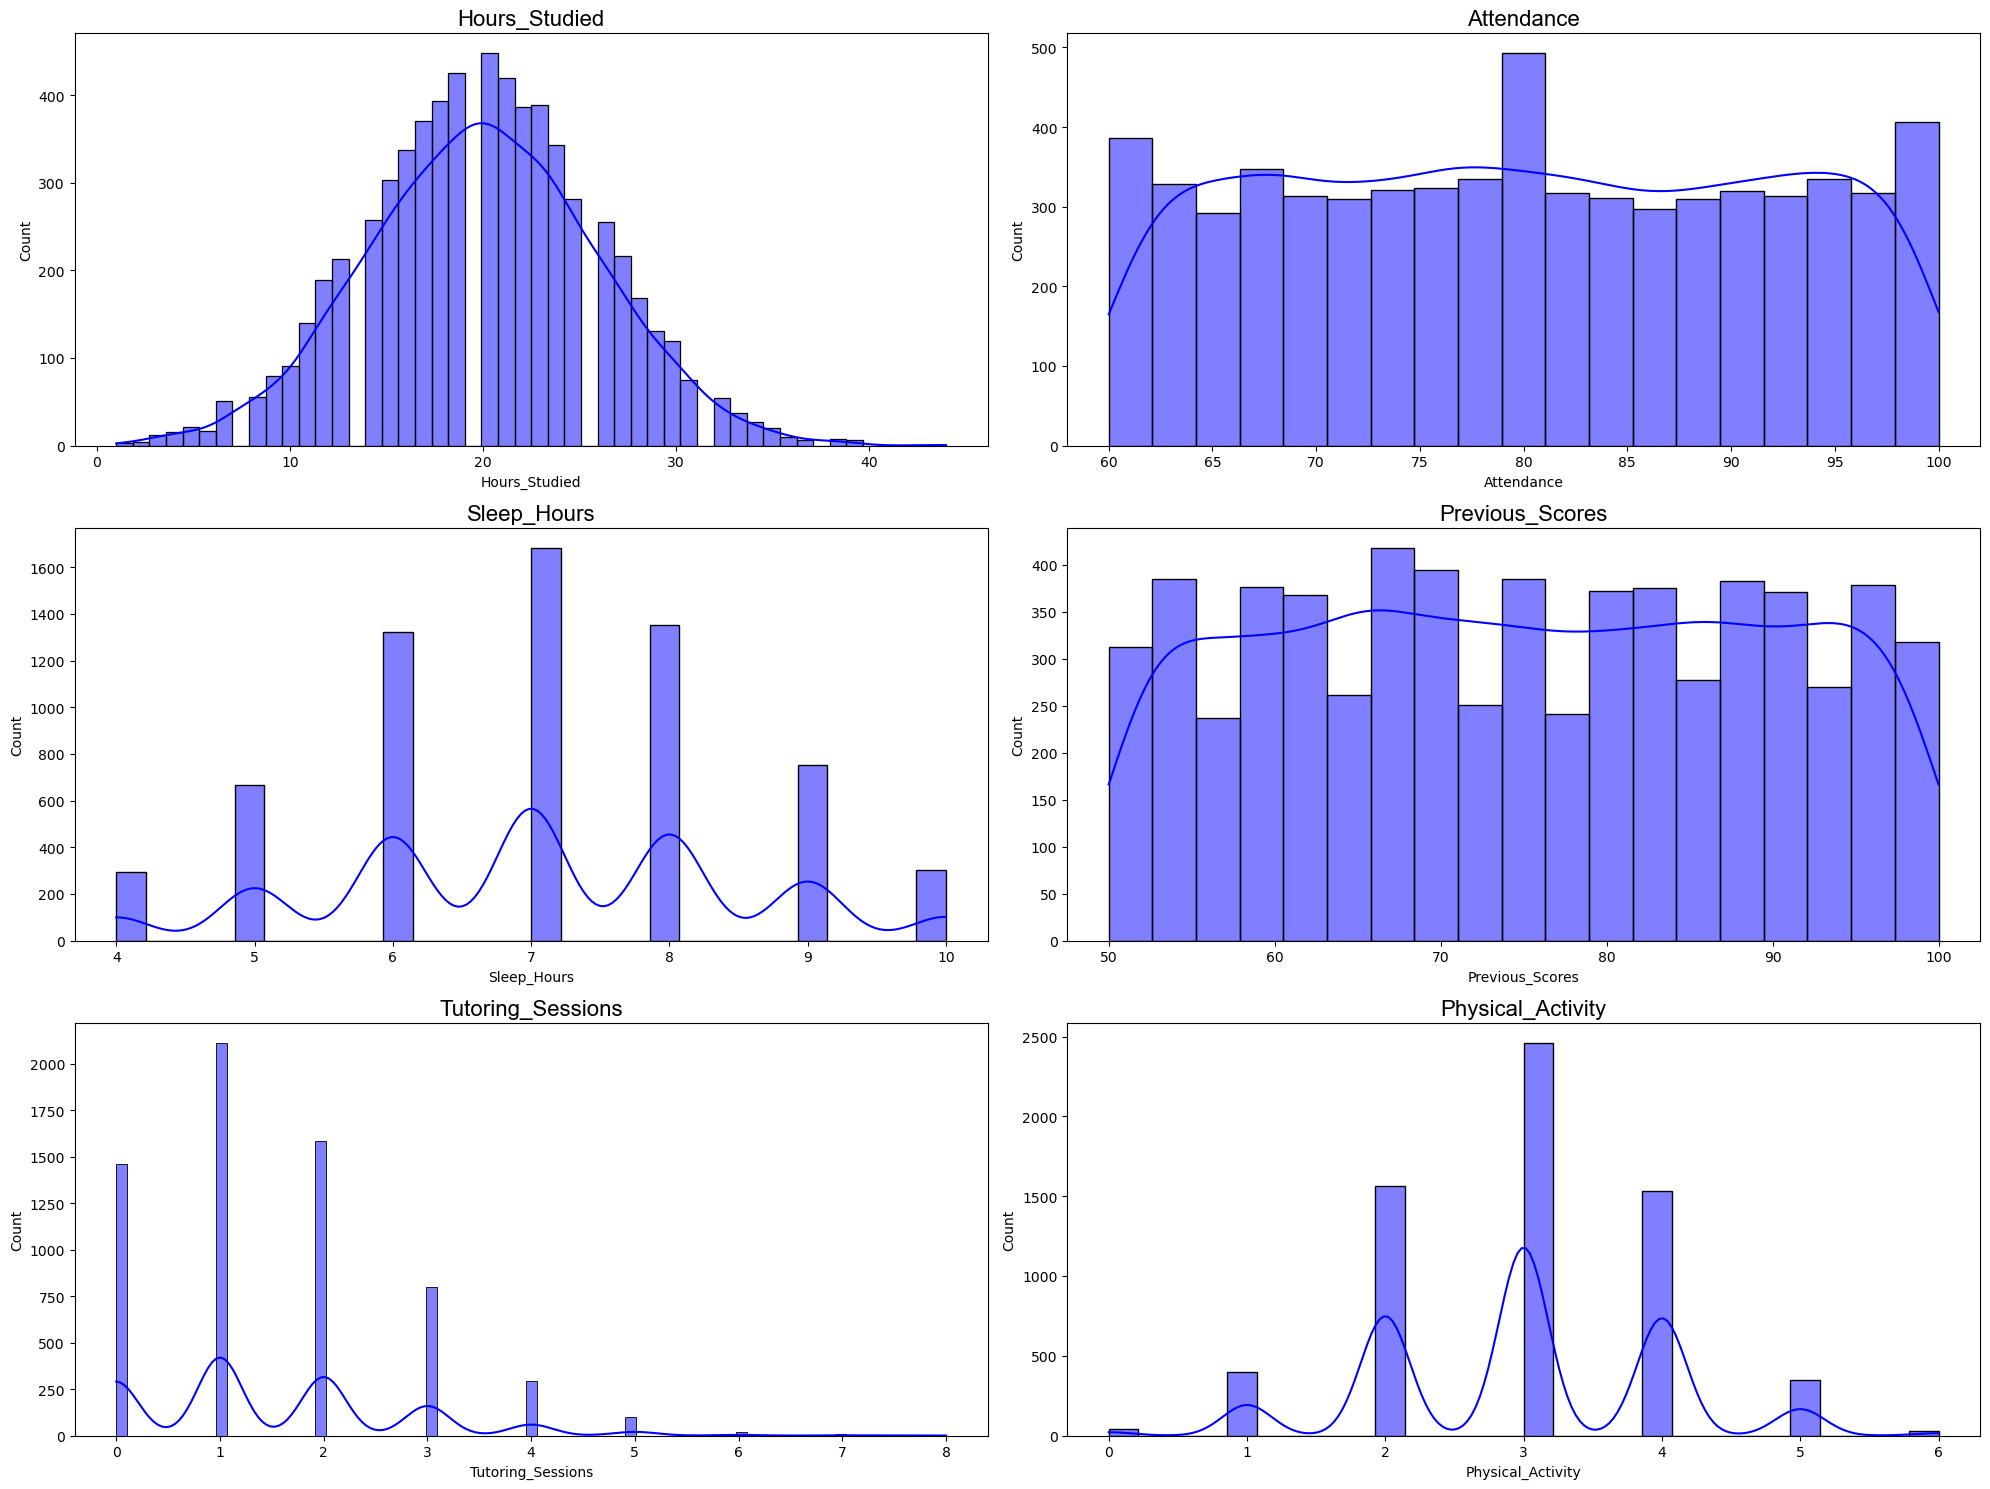

In [35]:
plt.figure(figsize=(20,15))
for i in range(len(numerical_col)-1): 
    plt.subplot(3,2,i+1)
    sns.histplot(df[numerical_col[i]],kde=True, color="blue")
    plt.title(numerical_col[i], fontdict={'fontname': 'Arial'}, fontsize=16)
plt.tight_layout()
plt.show()

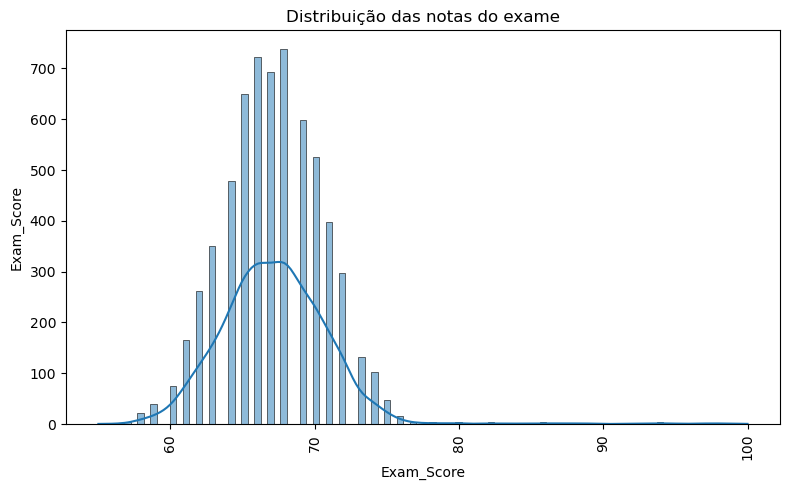

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Exam_Score'], palette="mako", bins=100, kde=True);
plt.title('Distribuição das notas do exame')
plt.xticks(rotation=90)
plt.xlabel('Exam_Score')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

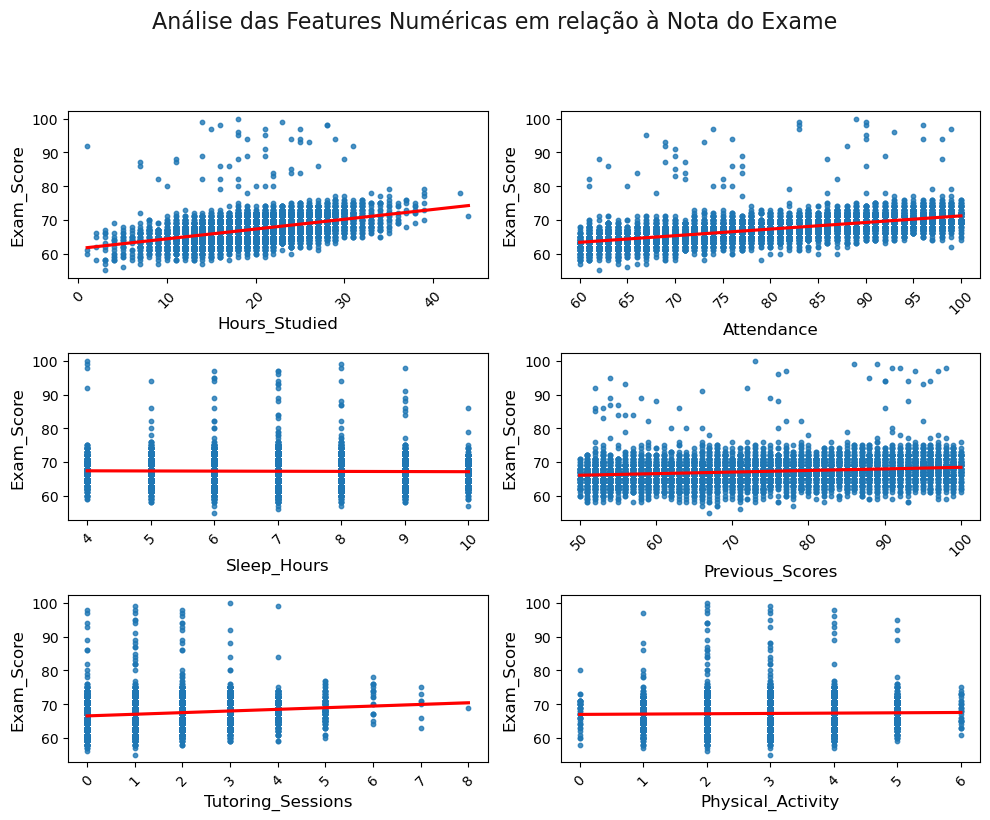

In [45]:
plt.figure(figsize=(10, 8))
plt.suptitle("Análise das Features Numéricas em relação à Nota do Exame",
             fontsize=16,
             alpha=0.9,
             y=1.02)


for i in range(len(numerical_col)-1): 
    plt.subplot(3,2,i+1)
    sns.regplot(x=df[numerical_col[i]], y=df['Exam_Score'], scatter_kws={'s': 10}, line_kws={"color": "red"})
    plt.xlabel(numerical_col[i], fontsize=12)
    plt.ylabel('Exam_Score', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


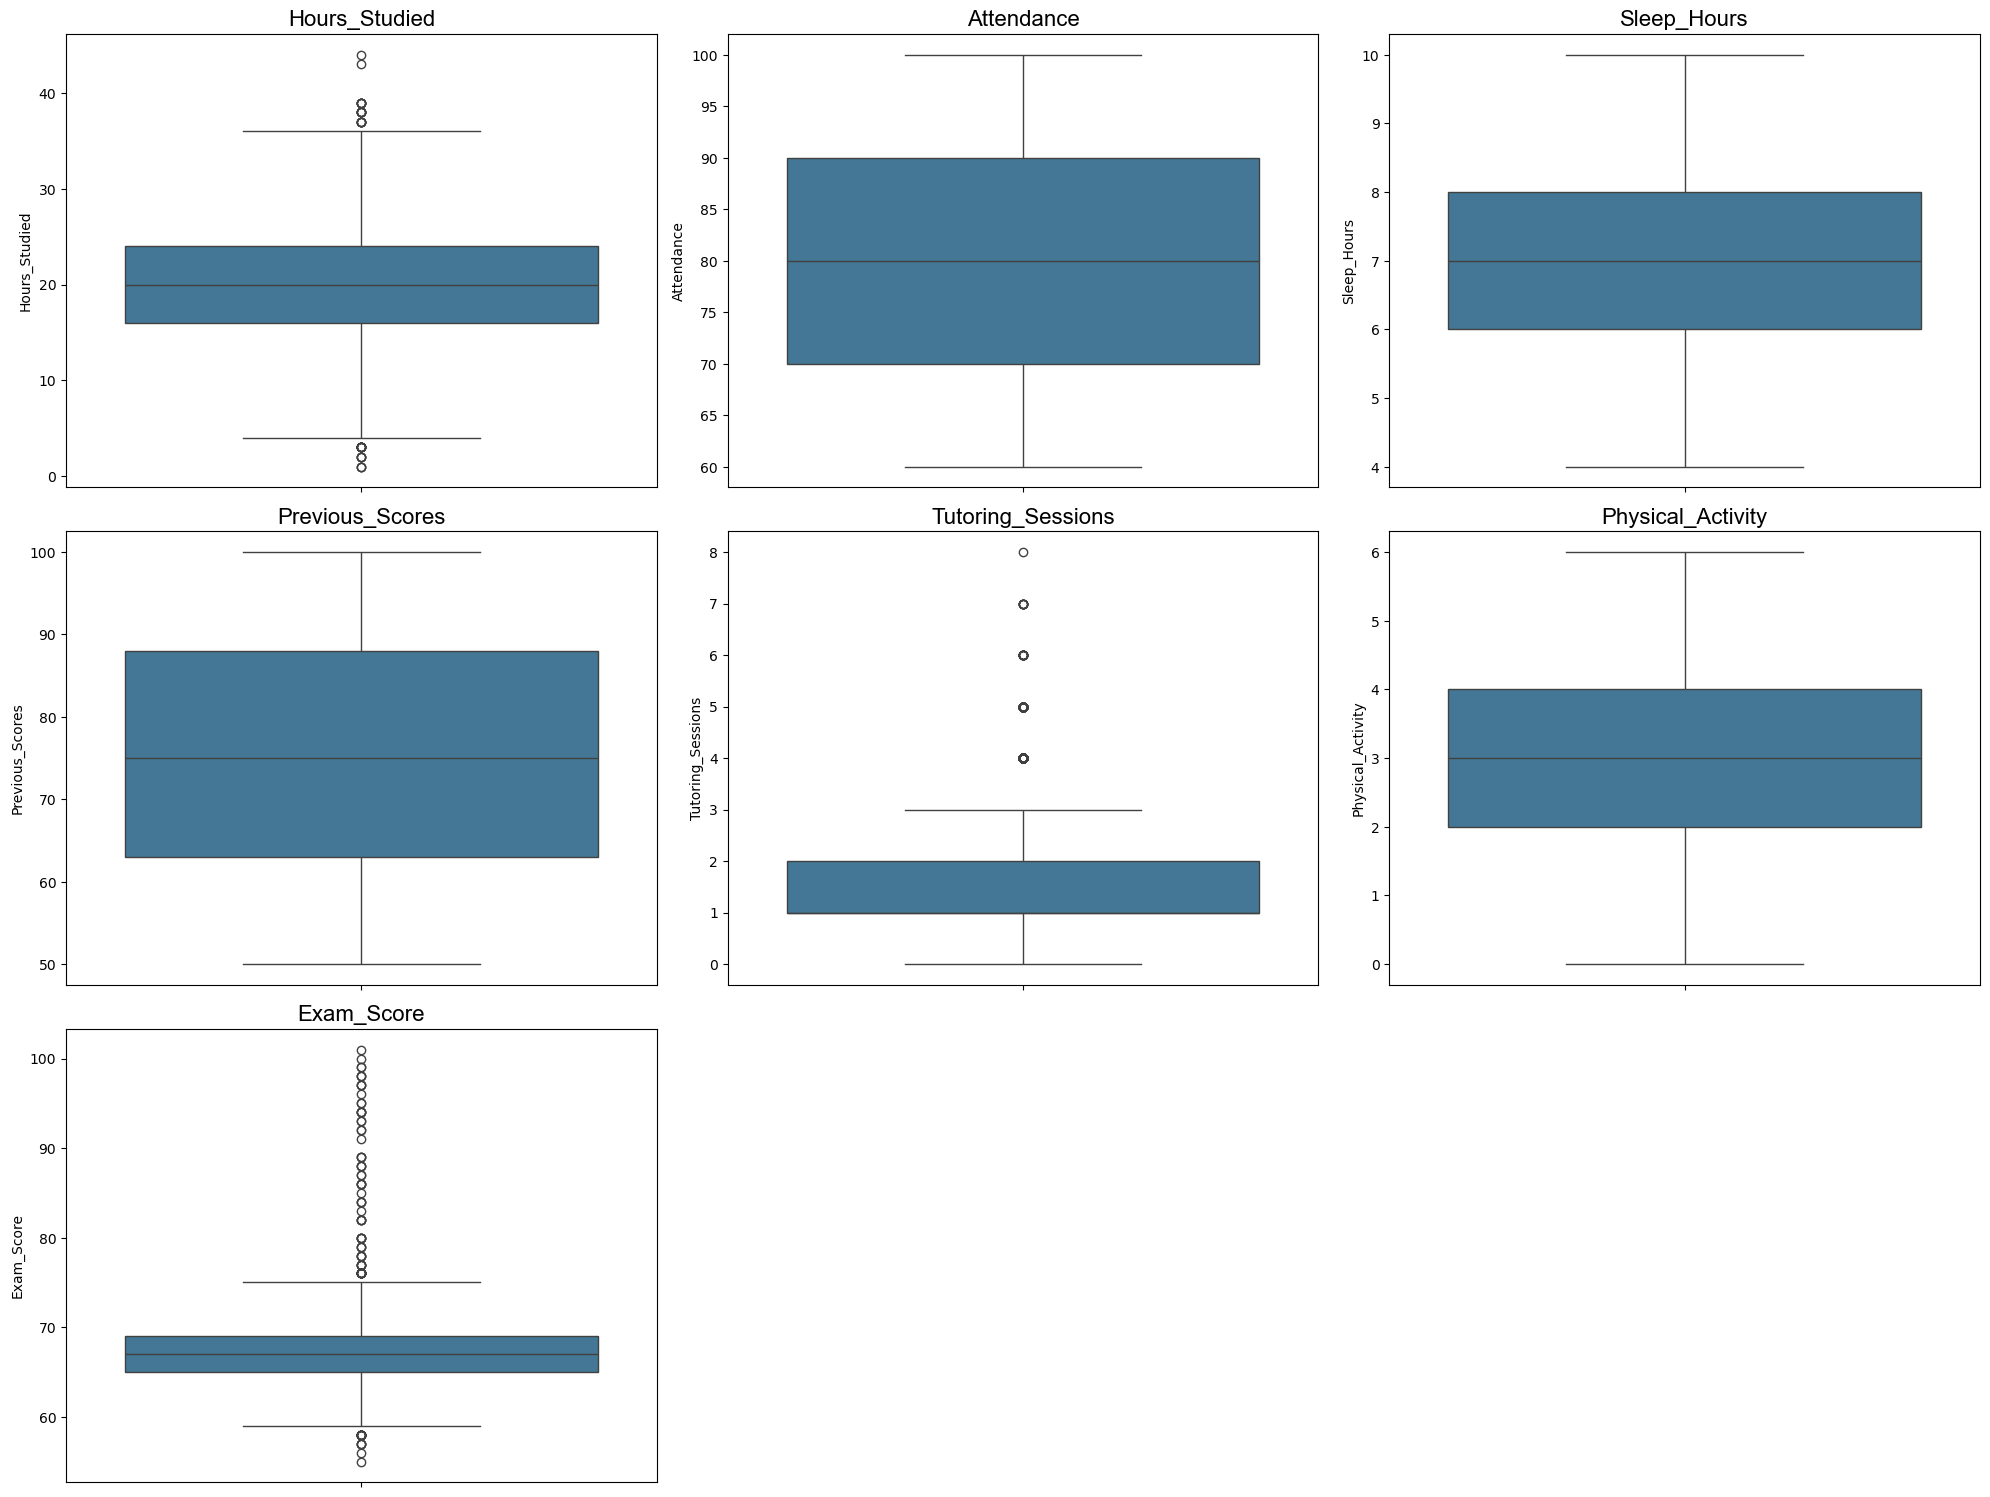

In [25]:
plt.figure(figsize=(20,20))
for i in range(len(numerical_col)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=df[numerical_col[i]],palette='mako')
    plt.title(numerical_col[i], fontdict={'fontname': 'Arial'}, fontsize=16)
plt.tight_layout()
plt.show()

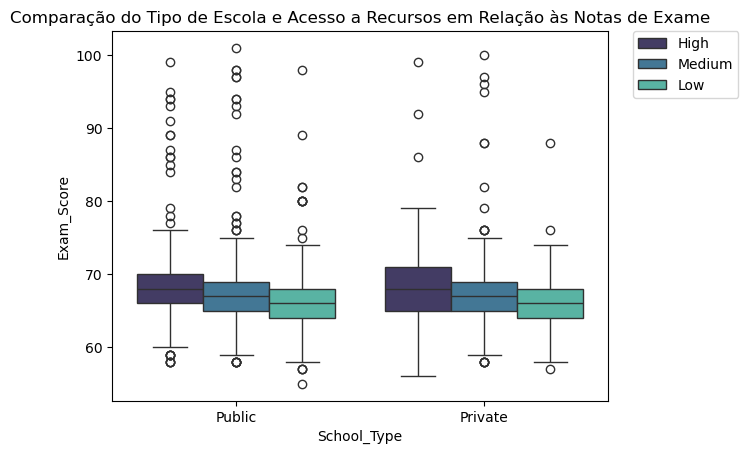

In [33]:
sns.boxplot(data=df, x="School_Type", y="Exam_Score", hue="Access_to_Resources", palette='mako')
plt.title('Comparação do Tipo de Escola e Acesso a Recursos em Relação às Notas de Exame')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

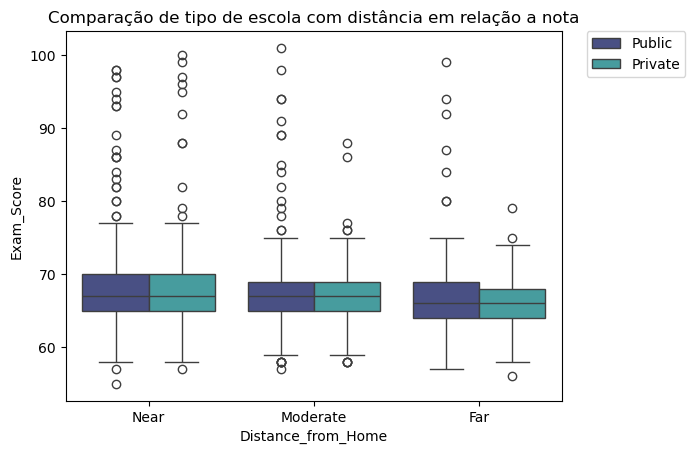

In [34]:
sns.boxplot(data=df, x="Distance_from_Home", y="Exam_Score", hue="School_Type", palette='mako')
plt.title('Comparação de tipo de escola com distância em relação a nota')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

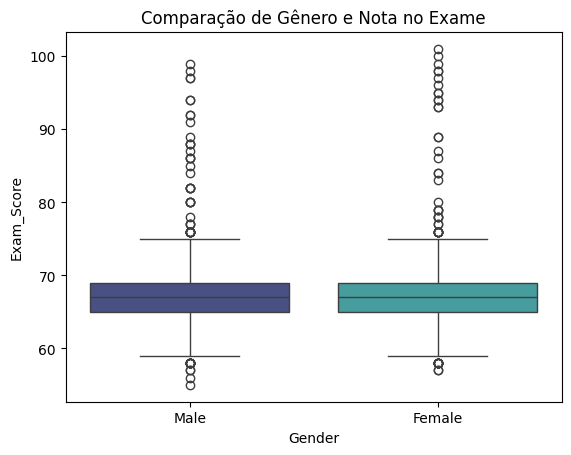

In [103]:
sns.boxplot(x='Gender', y='Exam_Score', data=df, palette='mako')
plt.title('Comparação de Gênero e Nota no Exame')
plt.show()


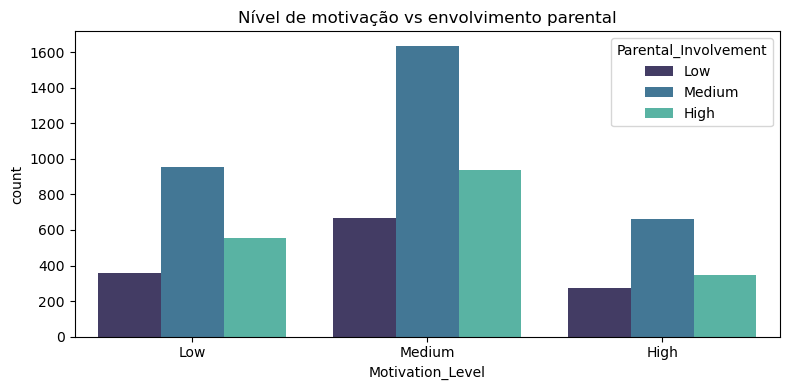

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Motivation_Level'],hue=df['Parental_Involvement'],palette='mako')
plt.title('Nível de motivação vs envolvimento parental')
plt.tight_layout()

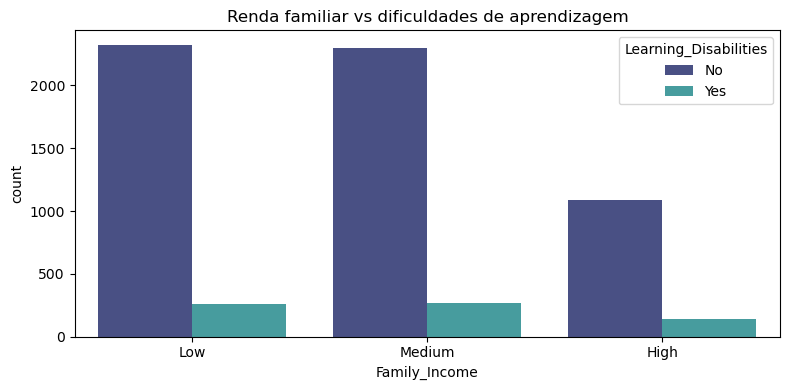

In [120]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Family_Income'],hue=df['Learning_Disabilities'],palette='mako')
plt.title('Renda familiar vs dificuldades de aprendizagem')
plt.tight_layout()

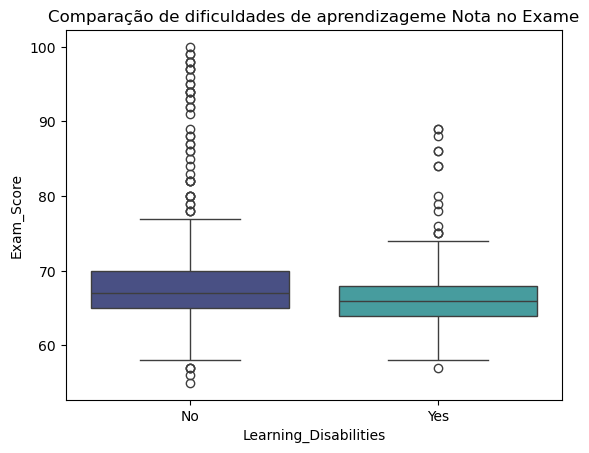

In [121]:
sns.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df, palette='mako')
plt.title('Comparação de dificuldades de aprendizageme Nota no Exame')
plt.show()

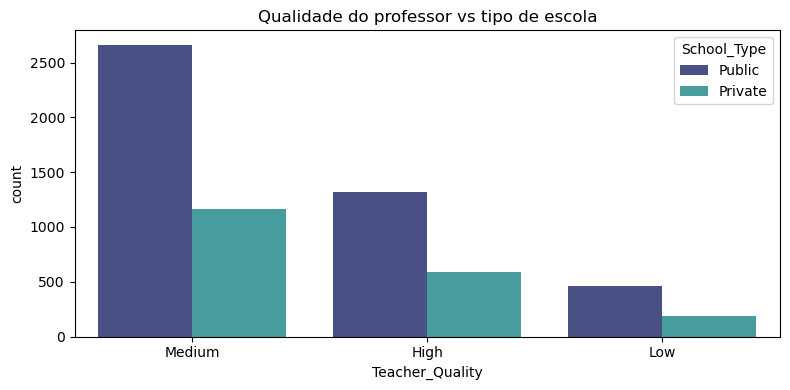

In [122]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Teacher_Quality'],hue=df['School_Type'],palette='mako')
plt.title('Qualidade do professor vs tipo de escola')
plt.tight_layout()

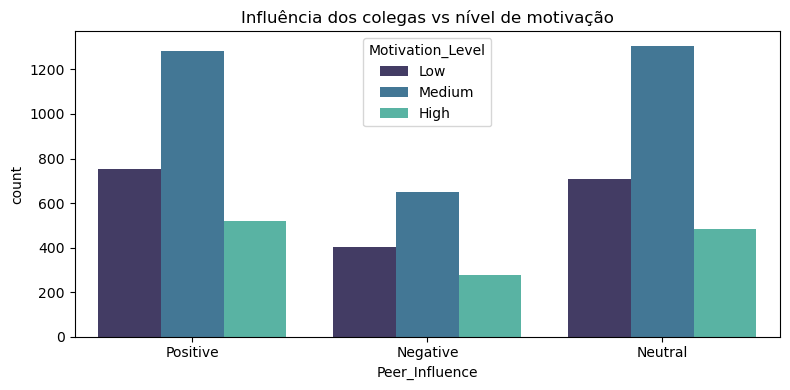

In [123]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Peer_Influence'],hue=df['Motivation_Level'],palette='mako')
plt.title('Influência dos colegas vs nível de motivação')
plt.tight_layout()

In [124]:
(df['Gender'].value_counts(normalize=True)*100).to_frame().T

Gender,Male,Female
proportion,57.832837,42.167163


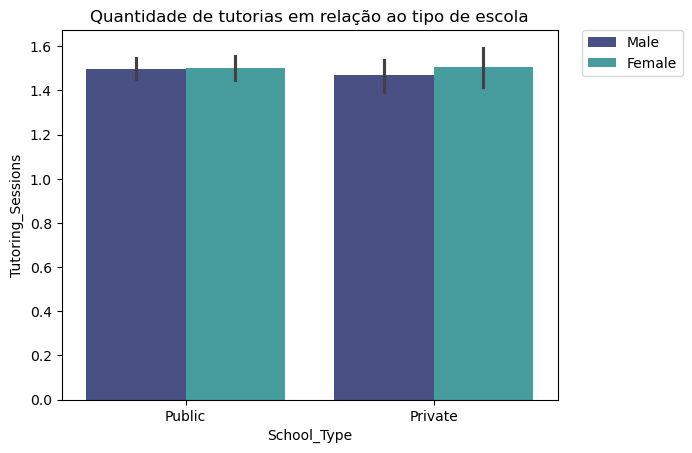

In [125]:
sns.barplot(x='School_Type', y='Tutoring_Sessions', data = df, hue='Gender', palette="mako");
plt.title('Quantidade de tutorias em relação ao tipo de escola')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

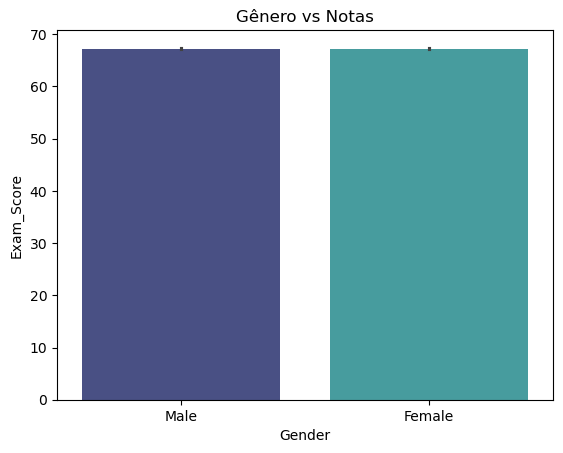

In [126]:
sns.barplot(x='Gender', y='Exam_Score', data=df, palette='mako')
plt.title('Gênero vs Notas')
plt.show()

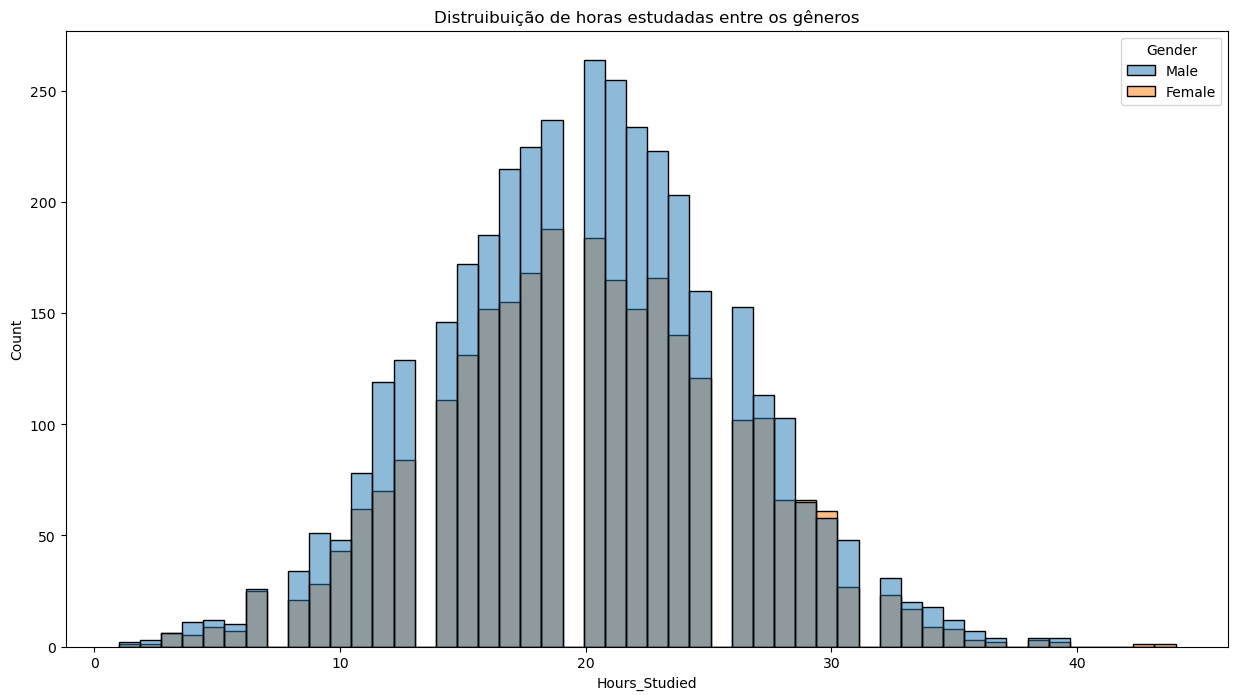

In [127]:
plt.figure(figsize=(15, 8))
sns.histplot(df, x='Hours_Studied', hue='Gender')
plt.title('Distruibuição de horas estudadas entre os gêneros')
plt.show()


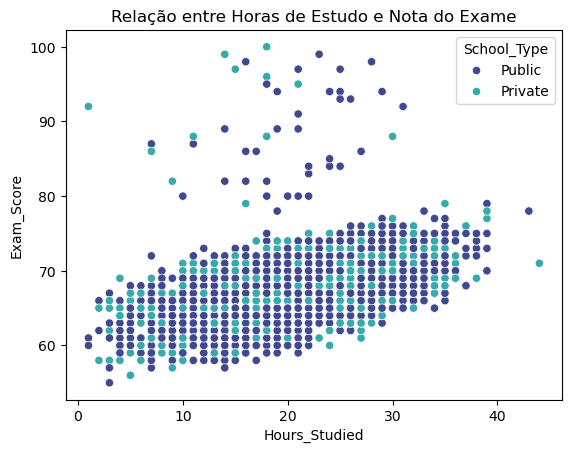

In [128]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='School_Type', data=df, palette="mako")
plt.title('Relação entre Horas de Estudo e Nota do Exame')
plt.show()


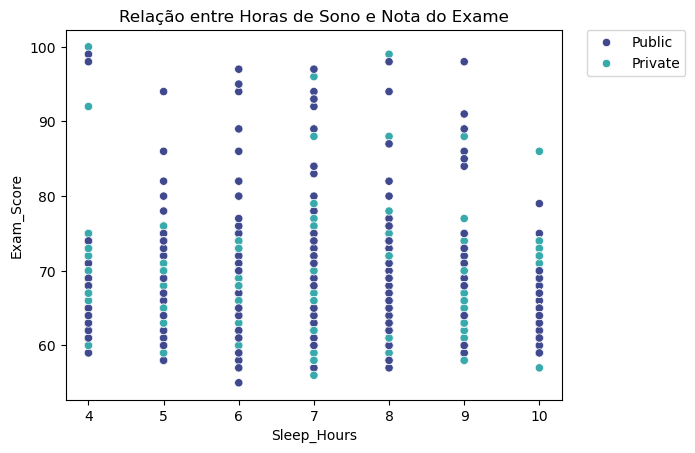

In [46]:
sns.scatterplot(x= 'Sleep_Hours', y='Exam_Score', hue='School_Type', data=df, palette="mako")
plt.title('Relação entre Horas de Sono e Nota do Exame')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


A seguintes variáveis são categóiricas por isso vamos transformá-las em números de acordo com o seu valor para fazer uma análise de correlação entre as features

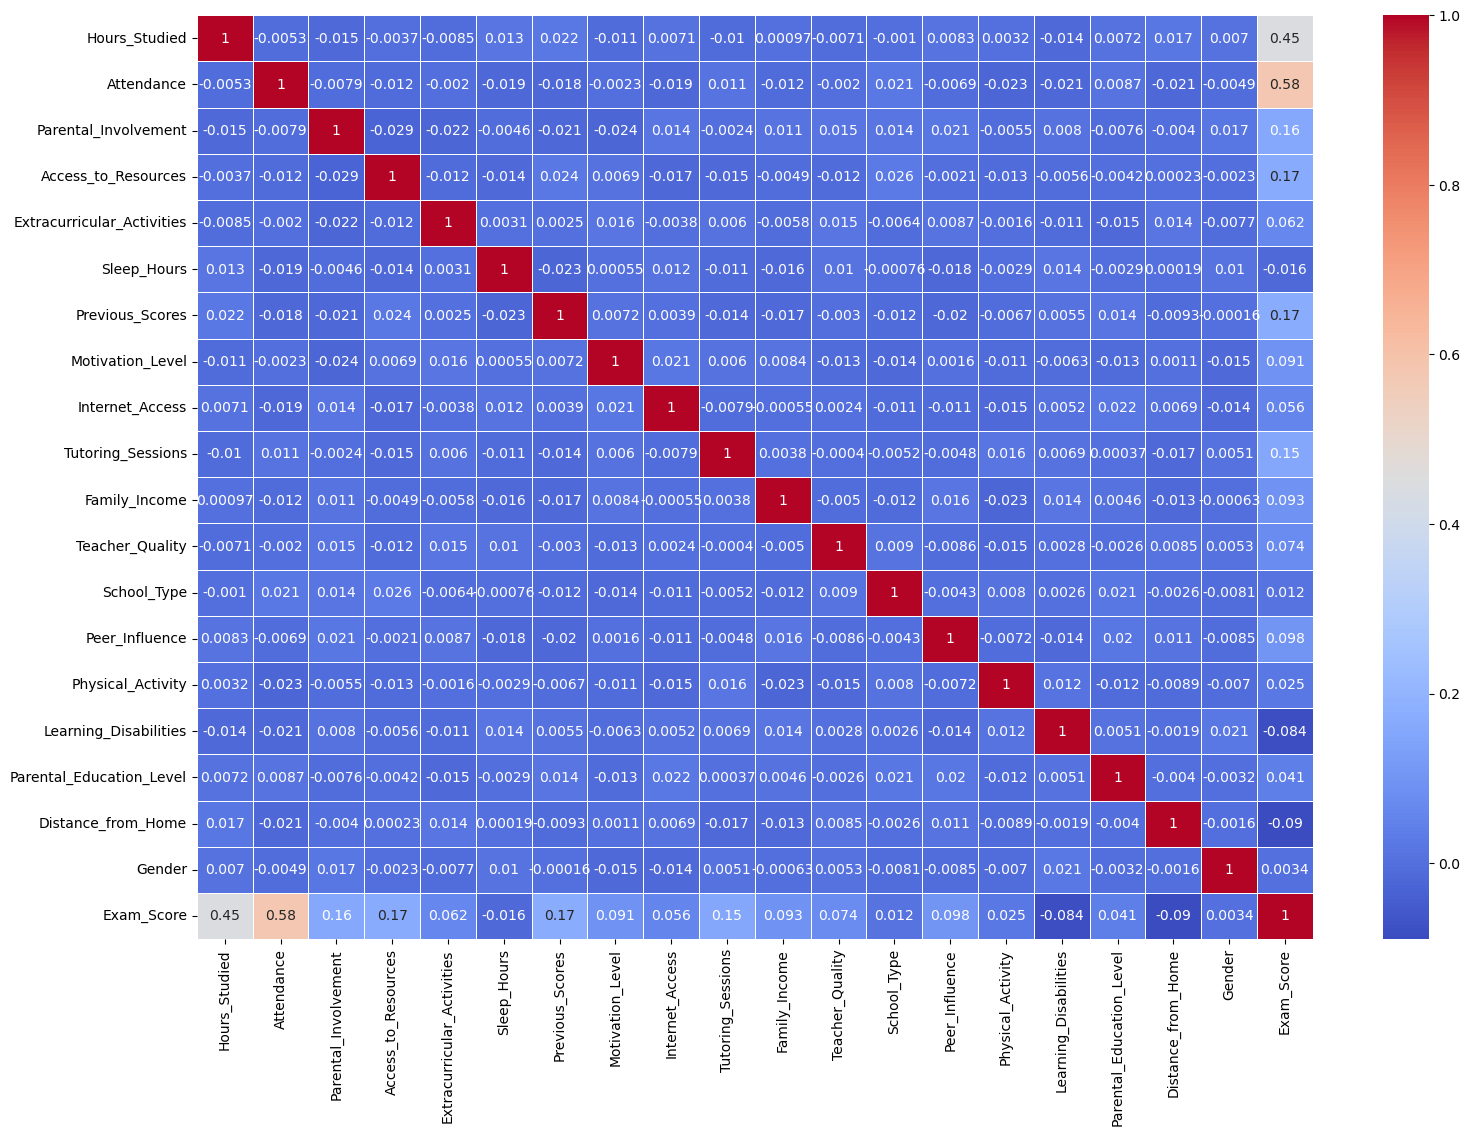

In [130]:
df_labeled = df.copy()

assortment_dict = {'Low': 1,  'Medium': 2, 'High': 3, 
                   'Negative': 1,  'Neutral': 2, 'Positive': 3,
                   'Male':0, 'Female':1,
                   'Public': 0, 'Private': 1,
                   'College':1, 'High School': 2, 'Postgraduate':3,
                   'No':0, 'Yes':1,
                   'Near': 1, 'Moderate': 2, 'Far':3
                   }

def safe_replace(col):
    return col.replace(assortment_dict).apply(pd.to_numeric, errors='coerce')

# Aplicando a função em cada coluna categórica
df_labeled[categorical_col] = df_labeled[categorical_col].apply(safe_replace)

plt.figure(figsize=(18, 12))
correlation_matrix = df_labeled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#### Interpretabilidade da matriz
**Attendance:** Correlação de 0.58, indicando uma forte correlação positiva. Isso sugere que quanto mais alta a presença do aluno, maior tende a ser sua nota no exame.  
**Hours_Studied:** Correlação de 0.45, mostrando uma correlação positiva moderada. Estudar mais horas está relacionado a melhores notas no exame.  
**Tutoring_Sessions, Parental_Involvement, Access_to_Resources e Previous_Scores:** Correlações de 0.16 e 0.17, sugerindo uma correlação fraca, mas ainda positiva. Participar de sessões de tutoria, ter o envolvimento dos pais, ter acesso a recursos ou ter bons desempenhos anteriores pode ter um leve impacto positivo nas notas de exames.  
**Learning_Disabilities e Distance_from_Home:** correlação baixa e negativa de -0.084 e -0.088, respectivamente, sugere uma correlação que, mesmo sendo uma correlação fraca, esses fatores como distância da casa até a escola e dificuldades de aprendizagem influenciam negativamente na nota do exame.  
#### Mas por que deixar variáveis com pouca correlação?
**1. Informação Contextual:**   
Features como *Physical_Activity* podem fornecer informações contextuais sobre o comportamento dos alunos, o que pode ser útil para entender um fenômeno mais amplo, mesmo que o impacto direto sobre *Exam_Score* seja baixo. Para análises interpretativas ou diagnósticas, essa informação pode ser relevante.  
Além disso, manter essas features pode ser útil para identificar outliers ou segmentos específicos da população que se comportam de maneira diferente.  
**2. Redundância e Robustez:**  
Em modelos preditivos, é comum manter algumas variáveis aparentemente fracas para garantir robustez ao modelo. Em situações futuras, ou em diferentes amostras, essas variáveis podem adquirir maior importância.  
Se o conjunto de dados ou as características da população mudarem, features com baixa correlação atual podem se tornar mais importantes.

# Preparação do dataset para a modelagem

In [134]:
df_labeled.dtypes

Hours_Studied                 int64
Attendance                    int64
Parental_Involvement          int64
Access_to_Resources           int64
Extracurricular_Activities    int64
Sleep_Hours                   int64
Previous_Scores               int64
Motivation_Level              int64
Internet_Access               int64
Tutoring_Sessions             int64
Family_Income                 int64
Teacher_Quality               int64
School_Type                   int64
Peer_Influence                int64
Physical_Activity             int64
Learning_Disabilities         int64
Parental_Education_Level      int64
Distance_from_Home            int64
Gender                        int64
Exam_Score                    int64
dtype: object

Vamos separar a target e normalizar os dados utilizando MinMaxScaler

In [135]:
cols = df_labeled.columns[:-1]

In [136]:
scaler = MinMaxScaler()
df_labeled[cols] = scaler.fit_transform(df_labeled[cols])

# Treinando o modelo

## TRAIN TEST SPLIT

In [138]:
X = df_labeled.drop('Exam_Score', axis = 1)
y = df_labeled['Exam_Score']

In [139]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4463, 19)
(4463,)
(1914, 19)
(1914,)


### Modelo 01 - Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

In [141]:
mse = mean_squared_error(y_test,y_pred_dt, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred_dt)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 13.061128526645769
RMSE: 3.61401833512861
MAPE: 0.02711243620117728


### Modelo 02 - Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [143]:
mse = mean_squared_error(y_test,y_pred_lr, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred_lr)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 3.38578821879701
RMSE: 1.8400511457013933
MAPE: 0.008035387641844013


### Modelo 03 - K-NN Regressor

In [144]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)


In [145]:
mse = mean_squared_error(y_test,y_pred_knn, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred_knn)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 9.410114942528738
RMSE: 3.0675910650751246
MAPE: 0.03062639020308491


### Modelo 04 - Support Vector Machine

In [146]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)

In [147]:
mse = mean_squared_error(y_test,y_pred_svr, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred_svr)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 3.412925557518933
RMSE: 1.8474105005436483
MAPE: 0.007531020124863037


### Modelo 05 - XGBoost

In [148]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

In [149]:
mse = mean_squared_error(y_test,y_pred_svr, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred_xgb)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 3.412925557518933
RMSE: 1.8474105005436483
MAPE: 0.013428188786389218


### Modelo 05 - Random Forest

In [150]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [151]:
mse = mean_squared_error(y_test,y_pred_rf, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred_rf)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 4.759932601880877
RMSE: 2.181726976933841
MAPE: 0.016052457581880016


## Avaliação dos modelos

Desses modelos acima testados, os que tiveram as melhores métricas foram:  
- Linear Regression  
MSE: 3.3858  
RMSE: 1.8400  
MAPE: 0.00803  

- Support Vector Machine  
MSE: 3.4129  
RMSE: 1.8474   
MAPE: 0.00753  


## Otimização e Ajuste Fino

Vamos utilizar o GridSearch para selecionar os melhores hiperparametros para obtermos a melhor combinação para um melhor resultado do treinamento do modelo

In [152]:

# Definir os parâmetros a serem testados para o SVR

param_grid_svr = {'kernel': ['linear', 'rbf'],
                  'C': [0.1, 1, 10],
                  'epsilon': [0.1, 0.2, 0.5],
                  'gamma': ['scale', 'auto']
                 }

svr = SVR()

clf_svr = GridSearchCV(svr, param_grid_svr, cv=5)
clf_svr.fit(X_train, y_train)

# Melhor modelo
best_svr = clf_svr.best_estimator_

# Treinar o modelo com todos os dados de treinamento
best_svr.fit(X_train, y_train)

# Prever os rótulos para os dados de teste
y_pred = best_svr.predict(X_test)

In [153]:
# Exibir os melhores parâmetros encontrados
print("Melhores Parâmetros Encontrados:")
print(best_svr)

Melhores Parâmetros Encontrados:
SVR(C=10, epsilon=0.2, gamma='auto')


In [154]:
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 3.253761936718843
RMSE: 1.803818709493513
MAPE: 0.005560663086733738


- MSE: 3.25. Indica que, em média, o quadrado da diferença entre o valor previsto e o valor real é de 3.25.  
- RMSE: 1.80. Sugere que, em média, o erro absoluto do modelo é de 1.80 unidades da sua variável alvo.  
- MAPE: 0.0055. Isso significa que, em média, o erro percentual do modelo é de 0.55%.  

### Testando o modelo com validação cruzada

In [155]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print(-scores)
print("Média do erro quadrático médio com validação cruzada:", (-scores.mean()))

[3.83219911 7.76266204 0.67853294 5.07584048 4.04891024 6.77806118
 5.84842276 6.82926008 1.80106258 3.46601075]
Média do erro quadrático médio com validação cruzada: 4.612096216725038


Média do MSE: 4.61. A média do MSE obtida pela validação cruzada é um pouco maior que o MSE obtido pelo GridSearchCV. Isso pode indicar que o modelo pode estar sofrendo um pouco de overfitting, ou seja, está se ajustando demais aos dados de treinamento e pode não generalizar bem para novos dados.  
Variância dos resultados: A grande variância nos valores de MSE obtidos pela validação cruzada indica que o modelo pode ser instável e sensível a pequenas mudanças nos dados de treinamento.

### Conclusão

- Desempenho Geral: O modelo apresenta um bom desempenho, com um erro médio relativamente baixo.
- Overfitting: A diferença entre o MSE do GridSearchCV e a média do MSE na validação cruzada sugere que o modelo pode estar levemente overfittando os dados.
- Instabilidade: A alta variância nos resultados da validação cruzada indica que o modelo pode ser instável.

# Salvando o modelo

In [156]:
# joblib.dump(model_svr, 'model_svr.json')

joblib.dump(best_svr, '.\Models\model_svr.pkl')


['.\\Models\\model_svr.pkl']